# Analysis

* Of the four variables tested, only temperature strongly correlates with latitude, which strongly indicates that temperature increases as one gets closer to the equator (lat 0).
* The equator and tropics also see higher-than-normal humidity. Humidity tends to decrease the farther north the city.
* Though wind speed and cloudiness do display weak correlations to latitude, they are weak enough to say that latitude has little impact on either.

In [57]:
# import dependencies
import random
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import csv
import openweathermapy.core as owm
import json
import os
from config import api_key
from urllib.error import HTTPError
import seaborn as sb

In [58]:
# create a lists of random geographic coordinates in order to create a list of cities
latitude = [random.uniform(-90,90) for x in range(2000)]
longitude = [random.uniform(-180,180) for x in range(2000)]
coordinates = list(zip(latitude, longitude))
# create empty lists to hold city and country codes
city_data = []
cities = []
country = []


In [59]:
# loop through the coordinates to grab the city data from citipy
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    city_data.append(citipy.nearest_city(lat, lon))


In [60]:
# loop through the city data to collect the names and the country codes
for city in city_data:
    name = city.city_name
    country_code = city.country_code
    cities.append(name)
    country.append(country_code)
    


In [61]:
# store name, longitute, and latitude into a pandas dataframe
cities_df = pd.DataFrame({
    "Name": cities,
    "Country": country,
   })

# Check dataframe for accuracy
cities_df.head()

,Country,Name
0,mx,paraiso
1,pf,atuona
2,pf,mataura
3,mx,guerrero negro
4,wf,vaitupu


In [62]:
# make sure no duplicate cities made it into the list
cities_df = cities_df.drop_duplicates(subset=['Name'], keep="first")
cities_df = cities_df.reset_index(drop=True)
cities_df.head(35)

,Country,Name
0,mx,paraiso
1,pf,atuona
2,pf,mataura
3,mx,guerrero negro
4,wf,vaitupu
5,re,saint-philippe
6,gl,maniitsoq
7,za,port alfred
8,sh,jamestown
9,jp,hasaki


In [63]:
# Check to make sure there are enough cities in the database to move forward with analysis
len(cities_df["Name"])

765

In [64]:
# set variables for api calls to Open Weather Map
settings = {"units": "imperial", "appid": api_key}

In [65]:
# manually check a few of the cities with the openweather api
test = owm.get_current(cities_df['Name'][34], **settings)
test

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -22.97, 'lon': -42.02},
 'dt': 1528225200,
 'id': 3471451,
 'main': {'humidity': 68,
  'pressure': 1017,
  'temp': 71.6,
  'temp_max': 71.6,
  'temp_min': 71.6},
 'name': 'Arraial do Cabo',
 'sys': {'country': 'BR',
  'id': 4469,
  'message': 0.0036,
  'sunrise': 1528190608,
  'sunset': 1528229396,
  'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
   'icon': '04d',
   'id': 803,
   'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 4.7}}

In [66]:
#create variables that will hold the json data for each city.
city_data = []
url = 'api.openweathermap.org/data/2.5/weather?q='

In [67]:
# create a loop that checks if the city from citipy is in the openweathermap database and drops it 
#from the cities list if it isn't.

for city in cities_df['Name']:
    try:
        weather_data = owm.get_current(city, **settings)
        id = weather_data['id']
    except HTTPError:
        print(f"Exception: {city} is not in OWM database.\n")
    else:
        city_data.append(weather_data)
        print(f'Retrieving weather data for {city} ({id})')
        print(f'{url}{city}\n')

Retrieving weather data for paraiso (4011743)
api.openweathermap.org/data/2.5/weather?q=paraiso

Retrieving weather data for atuona (4020109)
api.openweathermap.org/data/2.5/weather?q=atuona

Retrieving weather data for mataura (6201424)
api.openweathermap.org/data/2.5/weather?q=mataura

Retrieving weather data for guerrero negro (4021858)
api.openweathermap.org/data/2.5/weather?q=guerrero negro

Exception: vaitupu is not in OWM database.

Retrieving weather data for saint-philippe (6138908)
api.openweathermap.org/data/2.5/weather?q=saint-philippe

Retrieving weather data for maniitsoq (3421982)
api.openweathermap.org/data/2.5/weather?q=maniitsoq

Retrieving weather data for port alfred (964432)
api.openweathermap.org/data/2.5/weather?q=port alfred

Retrieving weather data for jamestown (2069194)
api.openweathermap.org/data/2.5/weather?q=jamestown

Retrieving weather data for hasaki (2112802)
api.openweathermap.org/data/2.5/weather?q=hasaki

Retrieving weather data for rikitea (4030556

Retrieving weather data for jalu (86049)
api.openweathermap.org/data/2.5/weather?q=jalu

Retrieving weather data for pevek (2122090)
api.openweathermap.org/data/2.5/weather?q=pevek

Retrieving weather data for east london (1006984)
api.openweathermap.org/data/2.5/weather?q=east london

Retrieving weather data for itarema (3393692)
api.openweathermap.org/data/2.5/weather?q=itarema

Retrieving weather data for yellowknife (6185377)
api.openweathermap.org/data/2.5/weather?q=yellowknife

Retrieving weather data for saskylakh (2017155)
api.openweathermap.org/data/2.5/weather?q=saskylakh

Exception: warqla is not in OWM database.

Retrieving weather data for santa rosa (3835994)
api.openweathermap.org/data/2.5/weather?q=santa rosa

Retrieving weather data for dong hoi (1582886)
api.openweathermap.org/data/2.5/weather?q=dong hoi

Retrieving weather data for chapleau (5919915)
api.openweathermap.org/data/2.5/weather?q=chapleau

Retrieving weather data for bredasdorp (1015776)
api.openweatherma

Retrieving weather data for marovoay (1059507)
api.openweathermap.org/data/2.5/weather?q=marovoay

Exception: tumannyy is not in OWM database.

Retrieving weather data for kruisfontein (986717)
api.openweathermap.org/data/2.5/weather?q=kruisfontein

Retrieving weather data for taoudenni (2450173)
api.openweathermap.org/data/2.5/weather?q=taoudenni

Retrieving weather data for madingou (2257990)
api.openweathermap.org/data/2.5/weather?q=madingou

Retrieving weather data for alice springs (2077895)
api.openweathermap.org/data/2.5/weather?q=alice springs

Retrieving weather data for kapuskasing (5989403)
api.openweathermap.org/data/2.5/weather?q=kapuskasing

Retrieving weather data for aksu (1524298)
api.openweathermap.org/data/2.5/weather?q=aksu

Retrieving weather data for torbay (6167817)
api.openweathermap.org/data/2.5/weather?q=torbay

Retrieving weather data for pachino (6539213)
api.openweathermap.org/data/2.5/weather?q=pachino

Retrieving weather data for opuwo (3354077)
api.openw

Retrieving weather data for boende (218680)
api.openweathermap.org/data/2.5/weather?q=boende

Retrieving weather data for bandarbeyla (64814)
api.openweathermap.org/data/2.5/weather?q=bandarbeyla

Retrieving weather data for marfino (503977)
api.openweathermap.org/data/2.5/weather?q=marfino

Retrieving weather data for norcasia (3673811)
api.openweathermap.org/data/2.5/weather?q=norcasia

Retrieving weather data for victoria (1733782)
api.openweathermap.org/data/2.5/weather?q=victoria

Retrieving weather data for pozo colorado (3437443)
api.openweathermap.org/data/2.5/weather?q=pozo colorado

Retrieving weather data for nosy varika (1058080)
api.openweathermap.org/data/2.5/weather?q=nosy varika

Retrieving weather data for roma (6539761)
api.openweathermap.org/data/2.5/weather?q=roma

Retrieving weather data for hetauda (1283339)
api.openweathermap.org/data/2.5/weather?q=hetauda

Retrieving weather data for hervey bay (2146219)
api.openweathermap.org/data/2.5/weather?q=hervey bay

Retr

Retrieving weather data for atbasar (1526038)
api.openweathermap.org/data/2.5/weather?q=atbasar

Retrieving weather data for matozinhos (3457393)
api.openweathermap.org/data/2.5/weather?q=matozinhos

Retrieving weather data for sao felix do xingu (3388847)
api.openweathermap.org/data/2.5/weather?q=sao felix do xingu

Retrieving weather data for maldonado (3441894)
api.openweathermap.org/data/2.5/weather?q=maldonado

Retrieving weather data for baragua (3567823)
api.openweathermap.org/data/2.5/weather?q=baragua

Retrieving weather data for xining (1788852)
api.openweathermap.org/data/2.5/weather?q=xining

Retrieving weather data for viseu (2732265)
api.openweathermap.org/data/2.5/weather?q=viseu

Retrieving weather data for guisa (3557332)
api.openweathermap.org/data/2.5/weather?q=guisa

Exception: macaboboni is not in OWM database.

Retrieving weather data for baykit (1510689)
api.openweathermap.org/data/2.5/weather?q=baykit

Retrieving weather data for kargasok (1504382)
api.openweath

Retrieving weather data for jacmel (3723779)
api.openweathermap.org/data/2.5/weather?q=jacmel

Exception: asfi is not in OWM database.

Retrieving weather data for dutlwe (933787)
api.openweathermap.org/data/2.5/weather?q=dutlwe

Retrieving weather data for road town (3577430)
api.openweathermap.org/data/2.5/weather?q=road town

Retrieving weather data for alekseyevka (548625)
api.openweathermap.org/data/2.5/weather?q=alekseyevka

Retrieving weather data for wairoa (2206808)
api.openweathermap.org/data/2.5/weather?q=wairoa

Retrieving weather data for ust-kut (2013923)
api.openweathermap.org/data/2.5/weather?q=ust-kut

Retrieving weather data for nelson bay (2155562)
api.openweathermap.org/data/2.5/weather?q=nelson bay

Retrieving weather data for daru (2409663)
api.openweathermap.org/data/2.5/weather?q=daru

Retrieving weather data for ryde (2638911)
api.openweathermap.org/data/2.5/weather?q=ryde

Retrieving weather data for tyrma (2014694)
api.openweathermap.org/data/2.5/weather?q=ty

Retrieving weather data for fort-shevchenko (609906)
api.openweathermap.org/data/2.5/weather?q=fort-shevchenko

Retrieving weather data for izumo (1861084)
api.openweathermap.org/data/2.5/weather?q=izumo

Retrieving weather data for molokovo (525509)
api.openweathermap.org/data/2.5/weather?q=molokovo

Retrieving weather data for kiunga (2093846)
api.openweathermap.org/data/2.5/weather?q=kiunga

Retrieving weather data for grasse (6454920)
api.openweathermap.org/data/2.5/weather?q=grasse

Retrieving weather data for severo-kurilsk (2121385)
api.openweathermap.org/data/2.5/weather?q=severo-kurilsk

Exception: wahran is not in OWM database.

Retrieving weather data for nefteyugansk (1497917)
api.openweathermap.org/data/2.5/weather?q=nefteyugansk

Retrieving weather data for quelimane (1028434)
api.openweathermap.org/data/2.5/weather?q=quelimane

Retrieving weather data for gillette (5826027)
api.openweathermap.org/data/2.5/weather?q=gillette

Retrieving weather data for port hawkesbury (6

Retrieving weather data for camabatela (2242885)
api.openweathermap.org/data/2.5/weather?q=camabatela

Retrieving weather data for haines junction (5969025)
api.openweathermap.org/data/2.5/weather?q=haines junction

Retrieving weather data for terrace (6162949)
api.openweathermap.org/data/2.5/weather?q=terrace

Retrieving weather data for raudeberg (3146487)
api.openweathermap.org/data/2.5/weather?q=raudeberg

Retrieving weather data for sikasso (2451185)
api.openweathermap.org/data/2.5/weather?q=sikasso

Retrieving weather data for sobolevo (525426)
api.openweathermap.org/data/2.5/weather?q=sobolevo

Retrieving weather data for isangel (2136825)
api.openweathermap.org/data/2.5/weather?q=isangel

Retrieving weather data for roald (3141667)
api.openweathermap.org/data/2.5/weather?q=roald

Exception: bolvasnita is not in OWM database.

Retrieving weather data for upata (3625710)
api.openweathermap.org/data/2.5/weather?q=upata

Retrieving weather data for comodoro rivadavia (3860443)
api.

Retrieving weather data for jacksonville (4160021)
api.openweathermap.org/data/2.5/weather?q=jacksonville

Retrieving weather data for domat (2661001)
api.openweathermap.org/data/2.5/weather?q=domat

Retrieving weather data for ust-uda (2013865)
api.openweathermap.org/data/2.5/weather?q=ust-uda

Retrieving weather data for santa maria (3450083)
api.openweathermap.org/data/2.5/weather?q=santa maria

Exception: kamenskoye is not in OWM database.

Retrieving weather data for sangin (1127547)
api.openweathermap.org/data/2.5/weather?q=sangin

Retrieving weather data for arcata (5558953)
api.openweathermap.org/data/2.5/weather?q=arcata

Retrieving weather data for belaya gora (2126785)
api.openweathermap.org/data/2.5/weather?q=belaya gora

Retrieving weather data for oktyabrskiy (515873)
api.openweathermap.org/data/2.5/weather?q=oktyabrskiy

Retrieving weather data for nang rong (1608424)
api.openweathermap.org/data/2.5/weather?q=nang rong

Retrieving weather data for abha (110690)
api.openw

In [68]:
# last check to make sure n>=500
len(city_data)

679

In [69]:
# Save the data to a csv file
with open('city_data.json', 'w') as outfile:
    json.dump(city_data, outfile, sort_keys=True, indent=4)

In [70]:
# create a dataframe from the dataset collected from OWM
humidity = [city['main']['humidity'] for city in city_data]
ws = [city['wind']['speed'] for city in city_data]
country = [city['sys']['country'] for city in city_data]
longitude = [city['coord']['lon'] for city in city_data]
latitude = [city['coord']['lat'] for city in city_data]
temperature = [city['main']['temp'] for city in city_data]
cloudiness = [city['clouds']['all'] for city in city_data]
city = [city['name'] for city in city_data]

final_cities_df = pd.DataFrame({
    'Name': city,
    'Country': country,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    "% Cloudiness": cloudiness,
    'Wind Speed': ws
})

final_cities_df.head()

,% Cloudiness,Country,Humidity,Latitude,Longitude,Name,Temperature,Wind Speed
0,20,MX,9,24.01,-104.61,Paraiso,87.80,11.41
1,20,PF,100,-9.80,-139.03,Atuona,79.30,18.37
2,88,NZ,90,-46.19,168.86,Mataura,37.26,11.21
3,0,MX,69,27.97,-114.04,Guerrero Negro,70.56,5.95
4,90,CA,82,45.36,-73.48,Saint-Philippe,58.37,11.41


In [71]:
# minor data clean up for presentable dataframe
final_cities_df = final_cities_df[["Name", 'Country', 'Latitude', 'Longitude', "Temperature", 'Humidity', "Wind Speed", 
                                 '% Cloudiness']]
final_cities_df.head()

,Name,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,% Cloudiness
0,Paraiso,MX,24.01,-104.61,87.80,9,11.41,20
1,Atuona,PF,-9.80,-139.03,79.30,100,18.37,20
2,Mataura,NZ,-46.19,168.86,37.26,90,11.21,88
3,Guerrero Negro,MX,27.97,-114.04,70.56,69,5.95,0
4,Saint-Philippe,CA,45.36,-73.48,58.37,82,11.41,90


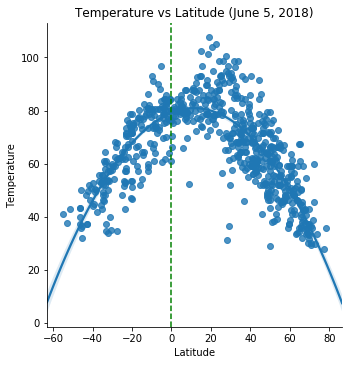

In [78]:
#Create scatter plot for latitude vs temperature
sb.lmplot("Latitude", "Temperature", final_cities_df, scatter=True, order=2)
plt.title("Temperature vs Latitude (June 5, 2018)")
plt.axvline(x=0, c='g', linestyle='dashed')
plt.savefig('temp_v_lat.png', bbox_inches='tight')
plt.show()

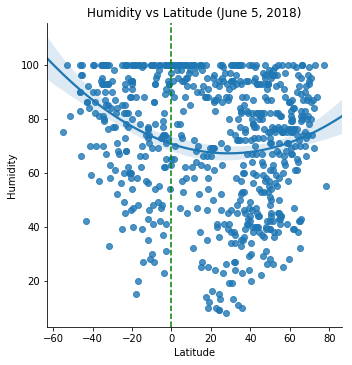

In [76]:
#Create scatter plot for latitude vs humidity
sb.lmplot("Latitude", "Humidity", final_cities_df, scatter=True, order=2)
plt.title("Humidity vs Latitude (June 5, 2018)")
plt.axvline(x=0, c='g', linestyle='dashed')
plt.savefig('humidity_v_lat.png', bbox_inches='tight')
plt.show()

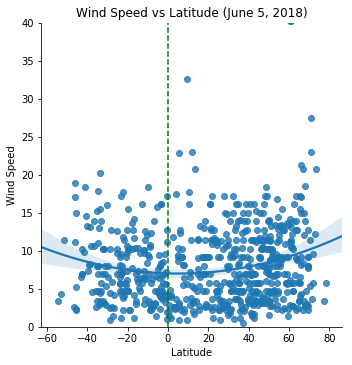

In [77]:
#Create scatter plot for latitude vs wind speed
sb.lmplot("Latitude", "Wind Speed", final_cities_df, scatter=True, order=2)
plt.title("Wind Speed vs Latitude (June 5, 2018)")
plt.ylim(0,40)
plt.axvline(x=0, c='g', linestyle='dashed')
plt.savefig('ws_v_lat.png', bbox_inches='tight')
plt.show()

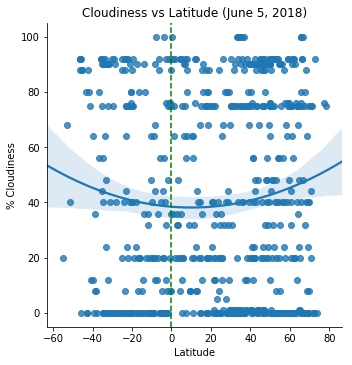

In [79]:
#Create scatter plot for latitude vs cloudiness
sb.lmplot("Latitude", "% Cloudiness", final_cities_df, scatter=True, order=2)
plt.title("Cloudiness vs Latitude (June 5, 2018)")
plt.axvline(x=0, c='g', linestyle='dashed')
plt.savefig('cloud_v_lat.png', bbox_inches='tight')
plt.show()